**Content**
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries <br>

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. <br>

In this project we have considered data from year 2000-2015 for 193 countries for further analysis. The final dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

**Variable Descriptions** <br>
1. **country** (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo) <br>
2. **year**(Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015) <br>
3. **status** (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. **life_expectancy** (Ratio) - the life expectancy of people in years for a particular country and year
5. **adult_mortality** (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6. **infant_deaths** (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7. **alcohol**(Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8. **percentage_expenditure** (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. **hepatitis_b** (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. **measles** (Ratio) - number of reported Measles cases per 1000 population
11. **bmi** (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. **under-five_deaths** (Ratio) - number of people under the age of five deaths per 1000 population
13. **polio** (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. **total_expenditure** (Ratio) - government expenditure on health as a percentage of total government expenditure
15. **diphtheria** (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. **hiv/aids** (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. **gdp** (Ratio) - Gross Domestic Product per capita
18. **population** (Ratio) - population of a country
19. **thinness_1-19_years** (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. **thinness_5-9_years** (Ratio) - rate of thinness among people aged 5-9
21. **income_composition_of_resources** (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. **schooling** (Ratio) - average number of years of schooling of a population

I'm acting as a DA consultants for WHO. In particular WHO is interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization.  Also WHO's previous approach included BMI and body weight related measures, but now they're sure that averages of these indicators are the same for both categories, thus, these parameters should not be included in their methodology anymore.

In this notebook I will:
1. See how average life expectancy is different for developed/developing countries.
2. Identify countries that are in "risk" zone for mortality.
3. Try to find a paradox in GDP vs expenditure on health within developed/developing.
4. Create a "profile analysis" for immunization in developed/developing countries.
5. Check whether BMI and body weight related measure should be included in the methodology of WHO 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('./Life_Expectancy_Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Renaming Columns
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [5]:
# How many countries do we have in the dataset?
data.groupby(['status'])['country'].nunique()

status
Developed      32
Developing    161
Name: country, dtype: int64

## Analysis of Immunization

**For each country find an average immunization rate for all years. Calculate the mean, dispersion, standard deviation. Plot histograms, describe how distribution varies among two groups of countries.**

In [8]:
immunization = data.groupby(['country', 'status'])[['hepatitis_b', 'diphtheria_', 'polio']].mean().reset_index()

In [12]:
def immunization_stat(vaccine):
    plt.figure(figsize=(8,7))
    sns.histplot(immunization, x=vaccine,  hue='status')
    plt.show()
    
    mean = round(immunization[vaccine].mean())
    std = round(immunization[vaccine].std())
    var = round(immunization[vaccine].var())
    
    print("The overall average for", vaccine, "is:", mean)
    print("The variance for", vaccine, "is:", var)
    print("The standard deviation for", vaccine, "is:", std)
    print("The averages per status:")
    print(immunization.groupby(['status'])[vaccine].mean())

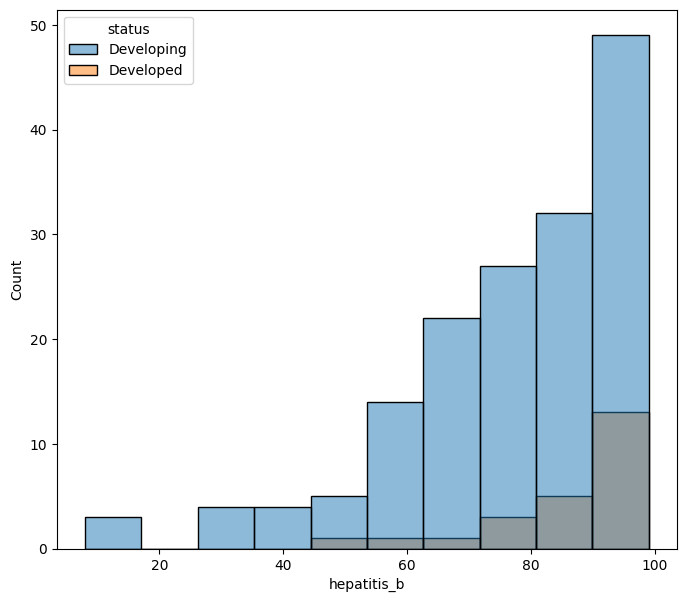

The overall average for hepatitis_b is: 79
The variance for hepatitis_b is: 354
The standard deviation for hepatitis_b is: 19
The averages per status:
status
Developed     86.194989
Developing    77.366776
Name: hepatitis_b, dtype: float64


In [13]:
immunization_stat('hepatitis_b')

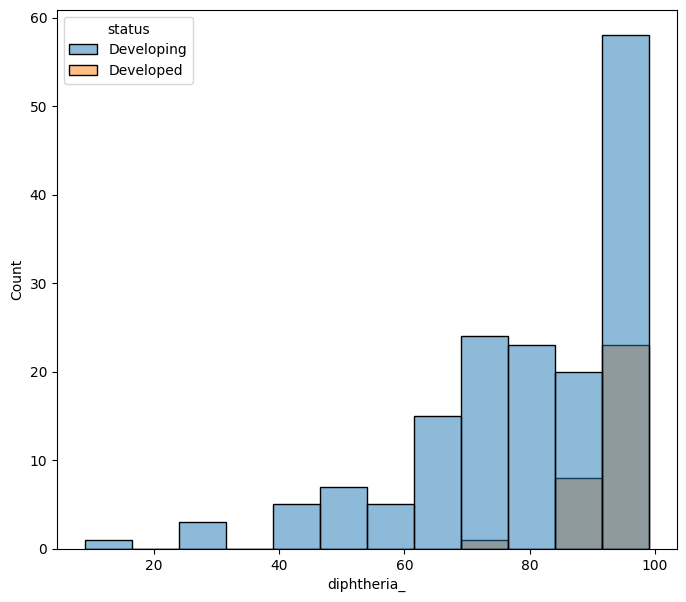

The overall average for diphtheria_ is: 82
The variance for diphtheria_ is: 295
The standard deviation for diphtheria_ is: 17
The averages per status:
status
Developed     93.476562
Developing    79.992791
Name: diphtheria_, dtype: float64


In [14]:
immunization_stat('diphtheria_')

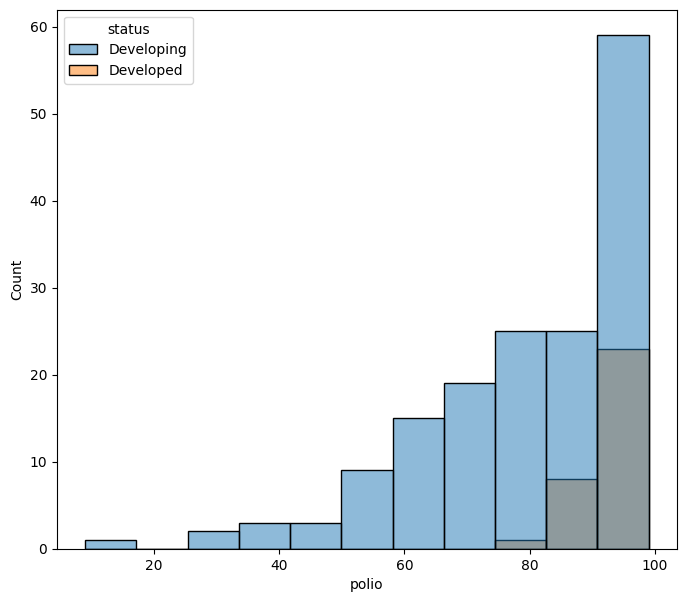

The overall average for polio is: 82
The variance for polio is: 279
The standard deviation for polio is: 17
The averages per status:
status
Developed     93.736328
Developing    80.183319
Name: polio, dtype: float64


In [25]:
immunization_stat('polio')

In [37]:
# Which vaccine out of all 3 has the highest average immunization rate across all countries?

# Calculate the mean immunization rates for each vaccine across all countries
mean_immunization_rates = data[['hepatitis_b', 'diphtheria_', 'polio']].mean()

# Find the vaccine with the highest mean immunization rate
vaccine_with_highest_mean = mean_immunization_rates.idxmax()
highest_mean = mean_immunization_rates.max()

print(f"The vaccine with the highest average immunization rate is '{vaccine_with_highest_mean}' with a mean rate of {highest_mean:.2f}")


The vaccine with the highest average immunization rate is 'polio' with a mean rate of 82.55


In [40]:
# Which vaccine has the lowest rate in developing countries?

# Isolate developing countries
developing_countries = data.query('status == "Developing"')

# Calculate the mean immunization rates for each vaccine across all developing countries
mean_immunization_rates = developing_countries[['hepatitis_b', 'diphtheria_', 'polio']].mean()

# Find the vaccine with the lowest mean immunization rate
vaccine_with_lowest_mean = mean_immunization_rates.idxmin()
lowest_mean = mean_immunization_rates.min()

print(f"The vaccine with the lowest average immunization rate is '{vaccine_with_lowest_mean}' with a mean rate of {lowest_mean:.2f}")



The vaccine with the lowest average immunization rate is 'hepatitis_b' with a mean rate of 79.76
